<a href="https://colab.research.google.com/github/tiffanyadora/airline-booking-project/blob/main/AirlineBooking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **🛠️ Setup and Data Loading**

In [ ]:
# Import libraries
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings
warnings.filterwarnings("ignore")

import itertools
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.ensemble import BalancedRandomForestClassifier
#from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import HistGradientBoostingClassifier

# Styling
plt.rcParams.update({'font.size': 14})
pd.set_option('display.max_rows', 1000)


ModuleNotFoundError: No module named 'catboost'

In [ ]:
import sys
print(sys.path)

['/content', '/env/python', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/usr/local/lib/python3.10/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.10/dist-packages/IPython/extensions', '/root/.ipython']


In [ ]:
df = pd.read_csv('/content/Passenger_booking_data.csv')
df = df.reset_index(drop=True)
print(f'The shape of the data: {df.shape}')

The shape of the data: (50002, 14)


In [ ]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,1,Internet,RoundTrip,21,12,6,Tue,AKLHGH,Australia,0,0,0,7.21,1
1,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
2,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
3,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
4,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0


## **🧹 Data Cleaning**

In [ ]:
# Check null
print(f'Total number of null values in data: {df.isna().sum().sum()}')

# Check duplicates
print(f'Total number of Duplicate rows in data: {df.duplicated().sum()}')

Total number of null values in data: 0
Total number of Duplicate rows in data: 719


In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
print(f'The shape of the data: {df.shape}')

The shape of the data: (49283, 14)


## **🔎 Exploratory Data Analysis (EDA)**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50002 entries, 0 to 50001
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50002 non-null  int64  
 1   sales_channel          50002 non-null  object 
 2   trip_type              50002 non-null  object 
 3   purchase_lead          50002 non-null  int64  
 4   length_of_stay         50002 non-null  int64  
 5   flight_hour            50002 non-null  int64  
 6   flight_day             50002 non-null  object 
 7   route                  50002 non-null  object 
 8   booking_origin         50002 non-null  object 
 9   wants_extra_baggage    50002 non-null  int64  
 10  wants_preferred_seat   50002 non-null  int64  
 11  wants_in_flight_meals  50002 non-null  int64  
 12  flight_duration        50002 non-null  float64
 13  booking_complete       50002 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_passengers,50002.0,1.591256,1.020167,1.00,1.00,1.00,2.00,9.0
purchase_lead,50002.0,84.940582,90.450548,0.00,21.00,51.00,115.00,867.0
length_of_stay,50002.0,23.044778,33.887171,0.00,5.00,17.00,28.00,778.0
flight_hour,50002.0,9.066277,5.412569,0.00,5.00,9.00,13.00,23.0
wants_extra_baggage,50002.0,0.668773,0.470659,0.00,0.00,1.00,1.00,1.0
wants_preferred_seat,50002.0,0.296968,0.456927,0.00,0.00,0.00,1.00,1.0
wants_in_flight_meals,50002.0,0.427143,0.494668,0.00,0.00,0.00,1.00,1.0
flight_duration,50002.0,7.277524,1.496854,4.67,5.62,7.57,8.83,9.5
booking_complete,50002.0,0.149574,0.356657,0.00,0.00,0.00,0.00,1.0


## **📊 Data Visualization**

In [ ]:
rc = {
    "axes.facecolor": "#FFF9ED",
    "figure.facecolor": "#FFF9ED",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}
sns.set(rc=rc)

palette_color = sns.color_palette('dark')
palette1 = ['dimgrey','crimson']
palette2 = ['crimson', 'dimgrey']
palette3 = ['darkgreen', 'orange']
palette4 = ['salmon','mediumseagreen']
palette5 = ['mediumseagreen','salmon']

Text(0.5, 1.0, 'booking_complete')

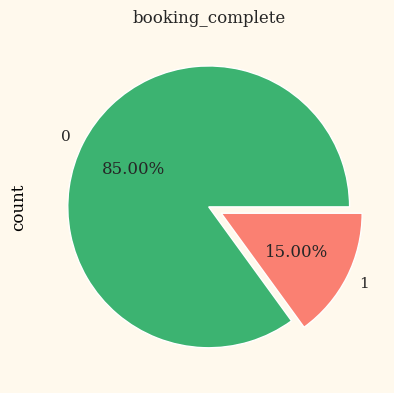

In [ ]:
# Pie chart for booking completion status
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
df['booking_complete'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', colors = palette5, explode = [0, 0.1])
plt.title('booking_complete')

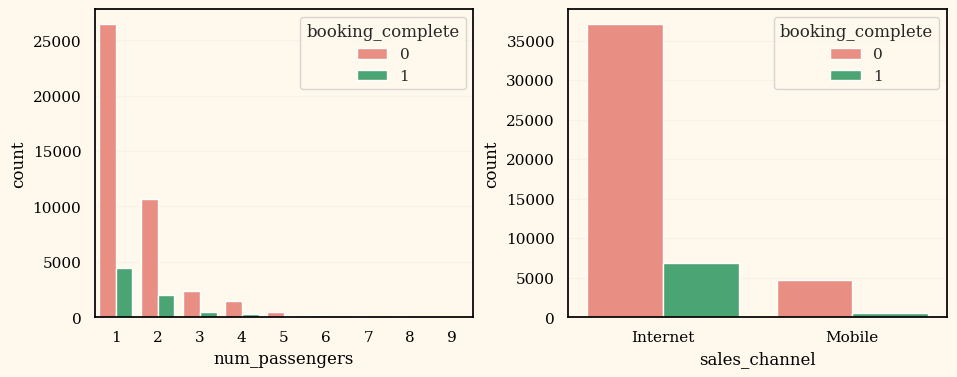

In [ ]:
# Distribution of 'num_passengers' and 'sales_channel'
plt.figure(figsize = (11,4))
plt.subplot(121)
sns.countplot(data = df, x = 'num_passengers', hue = 'booking_complete', palette = palette4)
plt.subplot(122)
sns.countplot(data = df, x = 'sales_channel', palette = palette4, hue = 'booking_complete')
plt.subplots_adjust(wspace=0.25)

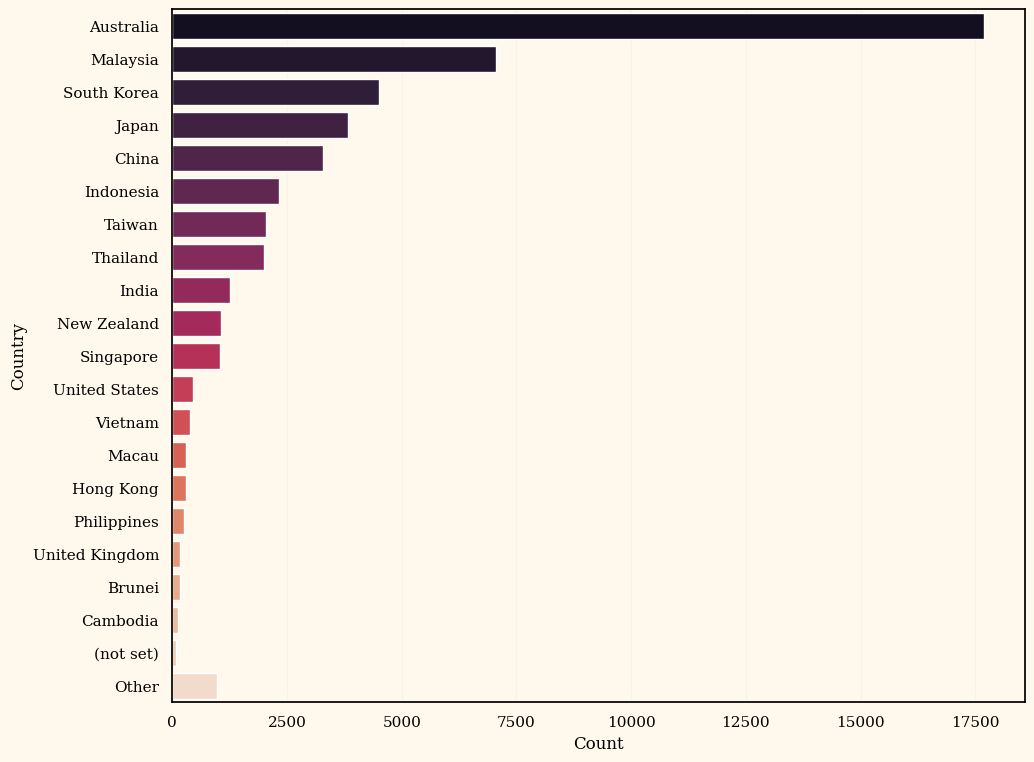

In [ ]:
# Top 20 booking origins (+ remaining)
plt.figure(figsize = (11,9))
country_counts = df.booking_origin.value_counts()
top_origin = country_counts.head(20)
other_count = country_counts.iloc[20:].sum()

temp = pd.DataFrame({
    'Country': top_origin.index,
    'Count': top_origin.values
})
other_data = pd.DataFrame({
    'Country': ['Other'],
    'Count': [other_count]
})
temp = pd.concat([temp, other_data], axis = 0)

sns.barplot(x='Count', y='Country', data=temp, palette = 'rocket')
del temp

<Axes: xlabel='flight_day', ylabel='count'>

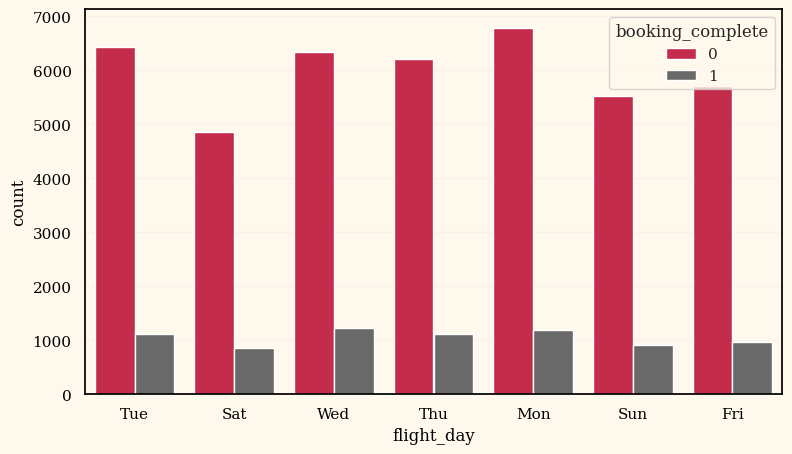

In [ ]:
# Flight day distribution
plt.figure(figsize = (9,5))
sns.countplot(data = df, x ='flight_day', hue = 'booking_complete', palette = palette2)


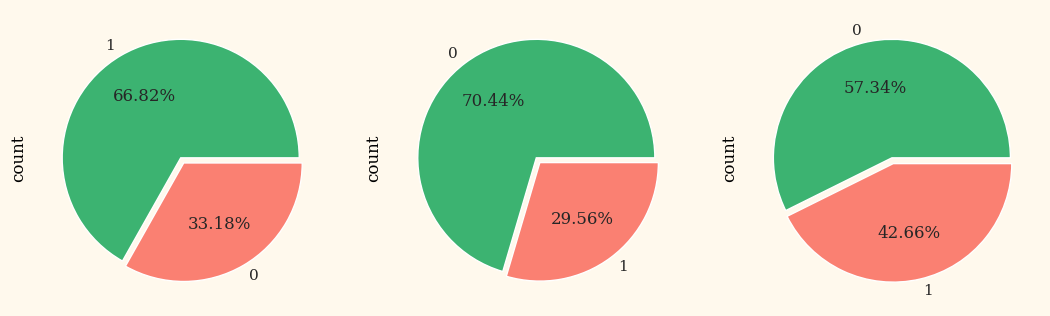

In [ ]:
# Add-ons and preferences
plt.figure(figsize = (13, 7))
binary_cols = ['wants_extra_baggage', 'wants_preferred_seat','wants_in_flight_meals']
for i, col in enumerate(binary_cols):
    plt.subplot(1,3,i+1)
    df[col].value_counts().plot(kind = 'pie', autopct = '%.2f%%', explode = [0, 0.05], colors = palette5)

    purchase_lead  count
0               1    681
1               2    666
2               6    649
3               7    636
4               5    611
5              13    604
6               4    597
7               8    591
8               9    587
9              12    582
10             20    581
11              3    571
12             10    568
13             21    557
14             18    556
    purchase_lead  count
0               1    681
1               2    666
2               6    649
3               7    636
4               5    611
5              13    604
6               4    597
7               8    591
8               9    587
9              12    582
10             20    581
11              3    571
12             10    568
13             21    557
14             18    556


<Axes: xlabel='count', ylabel='purchase_lead'>

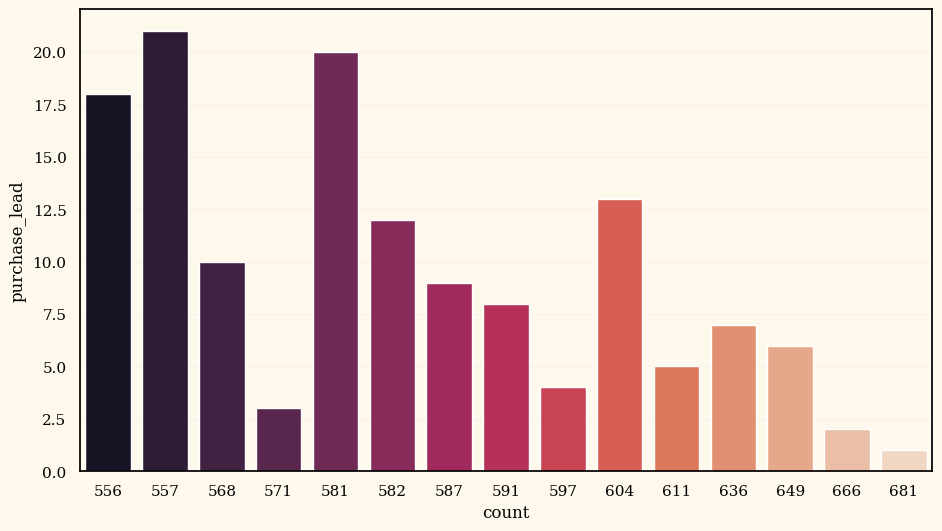

In [ ]:
# Distribution of Purchase Lead for Bookings
plt.figure(figsize=(11, 6))
temp = df.purchase_lead.value_counts().head(15).reset_index()
temp.columns = ['purchase_lead', 'count']  # Rename the columns
sns.barplot(data=temp, x='count', y='purchase_lead', palette='rocket')

## **📂 Data Processing**

In [ ]:
# Make a copy of the original DataFrame
df_processed = df.copy()

# One-hot encode categorical variables
df_processed = pd.get_dummies(df_processed, columns=['sales_channel', 'trip_type', 'flight_day', 'booking_origin'], drop_first=True)

# Drop specified columns
df_processed.drop(['purchase_lead', 'route'], axis=1, inplace=True)

# Standardize numerical columns
num_cols = ['num_passengers', 'length_of_stay', 'flight_hour', 'flight_duration']
scaler = StandardScaler()

#fit and transform the data
df_processed[num_cols] = scaler.fit_transform(df_processed[num_cols])

In [ ]:
df_processed

,num_passengers,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Mobile,trip_type_OneWay,...,booking_origin_Timor-Leste,booking_origin_Tonga,booking_origin_Tunisia,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam
0,-0.579574,-0.325931,-0.566516,0,0,0,-0.045111,1,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0.400667,-0.119361,-0.381759,1,0,0,-1.174157,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,-0.579574,-0.089851,-1.120787,0,0,0,-1.174157,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0.400667,-0.030831,1.465811,1,1,0,-1.174157,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,-0.579574,0.234759,-0.936030,0,0,1,-1.174157,0,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49997,0.400667,-0.502991,-0.012245,1,0,1,-1.107350,0,False,False,...,False,False,False,False,False,False,False,False,False,False
49998,-0.579574,-0.502991,-0.936030,0,0,0,-1.107350,0,False,False,...,False,False,False,False,False,False,False,False,False,False
49999,-0.579574,-0.502991,2.389596,0,0,1,-1.107350,0,False,False,...,False,False,False,False,False,False,False,False,False,False
50000,-0.579574,-0.502991,0.357269,1,0,1,-1.107350,0,False,False,...,False,False,False,False,False,False,False,False,False,False


## **🤖 Model Training**

In [ ]:
X = df_processed.drop('booking_complete', axis = 1)
y = df_processed['booking_complete']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size =0.2, random_state = 42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape


((40001, 119), (10001, 119), (40001,), (10001,))

In [ ]:
def train_classifier(model, x_train, y_train, x_val, y_val, name="model"):
    print(f"For {name}")
    model.fit(x_train, y_train)
    y_pred = model.predict(x_val)
    score = accuracy_score(y_val, y_pred)
    print(f"{confusion_matrix(y_pred, y_val)}")
    print(f"Accuracy is {score}")
    print('='*80)


In [ ]:
import lightgbm as lgb

# Assuming you have your dataset and labels ready
train_data = lgb.Dataset(X_train, label=y_train)

# Set parameters for LightGBM training
params = {
    'force_row_wise': True,  # Or force_col_wise=True if memory is a concern
    # Other parameters...
}

# Train the LightGBM model
model = lgb.train(params, train_data)


[LightGBM] [Info] Total Bins 398
[LightGBM] [Info] Number of data points in the train set: 40001, number of used features: 49
[LightGBM] [Info] Start training from score 0.148946


In [ ]:
models = {
    'LogisticRegression':LogisticRegression(),
    'Balanced-RFC': BalancedRandomForestClassifier(random_state = 42),
    'RFC':RandomForestClassifier(),
    #'CatBoost': CatBoostClassifier(verbose = False, random_state = 42),
    'Light GBM':LGBMClassifier(),
    'XGBoost':XGBClassifier(random_state = 42),
    'Hist-Gradient':HistGradientBoostingClassifier()
}

In [ ]:
df_processed.columns = df_processed.columns.str.replace(' ', '_')

In [ ]:
for i in range(len(models)):
    model = list(models.values())[i]
    name = list(models.keys())[i]
    train_classifier(model, X_train, y_train, X_val, y_val, name = name)

For LogisticRegression
[[8472 1512]
 [   8    9]]
Accuracy is 0.8480151984801519
For Balanced-RFC
[[5469  411]
 [3011 1110]]
Accuracy is 0.6578342165783422
For RFC
[[8137 1288]
 [ 343  233]]
Accuracy is 0.8369163083691631
For Light GBM
[LightGBM] [Info] Number of positive: 5958, number of negative: 34043
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003669 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 398
[LightGBM] [Info] Number of data points in the train set: 40001, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.148946 -> initscore=-1.742890
[LightGBM] [Info] Start training from score -1.742890
[[8454 1491]
 [  26   30]]
Accuracy is 0.8483151684831517
For XGBoost
[[8365 1409]
 [ 115  112]]
Accuracy is 0.8476152384761524
For Hist-Gradient
[[8473 1499]
 [   7   22]]
Accuracy is 0.8494150584941506
